In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates
from cycler import cycler
from collections import OrderedDict
import matplotlib.mlab as ml

%matplotlib notebook

In [10]:
# Save plots?
save = True

In [22]:
# Load HDF file
folder = 'T2_reflectance_standard_currentsweep_filterSandwich'
folder ='T2_d20Water_filterSandwich_laserSweep'
data_folder = '../Data/'  # 'Z:/LabOnChip/Data/'
df = pd.HDFStore(data_folder + str(folder) +'/analysis.h5')['df']

# Create column for time since start of measurement
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

In [23]:
df.head()
# df.info()

,datetime,chip,concentration,current,flow_rate,fs,humidity,measurementID,medium,optical power,sample_no,sweep_no,sweeps,t_in,t_out,tempC,A,tau,c,delta
0,2016-09-22 12:41:25.373556,T2,0.0,0.5,1,0.0001,39.4,1.474544e+09,D2o (%),0.25731,1000,1,250,23.25,23.25,24.21,1.669460,11.933900,-0.019398,0.000000
1,2016-09-22 12:41:26.648683,T2,0.0,0.5,1,0.0001,39.4,1.474544e+09,D2o (%),0.25731,1000,2,250,23.25,23.25,24.21,1.640363,12.097351,-0.020475,0.021252
2,2016-09-22 12:41:26.897708,T2,0.0,0.5,1,0.0001,39.4,1.474544e+09,D2o (%),0.25731,1000,3,250,23.25,23.25,24.21,1.671697,11.925321,-0.019417,0.025403
3,2016-09-22 12:41:27.101728,T2,0.0,0.5,1,0.0001,39.4,1.474544e+09,D2o (%),0.25731,1000,4,250,23.25,23.25,24.21,1.671339,11.915534,-0.019015,0.028803
4,2016-09-22 12:41:27.305749,T2,0.0,0.5,1,0.0001,39.4,1.474544e+09,D2o (%),0.25731,1000,5,250,23.25,23.25,24.21,1.650391,12.030099,-0.019870,0.032203


# Real time raw data

In [24]:
grouped = df.groupby(['concentration'])

<IPython.core.display.Javascript object>


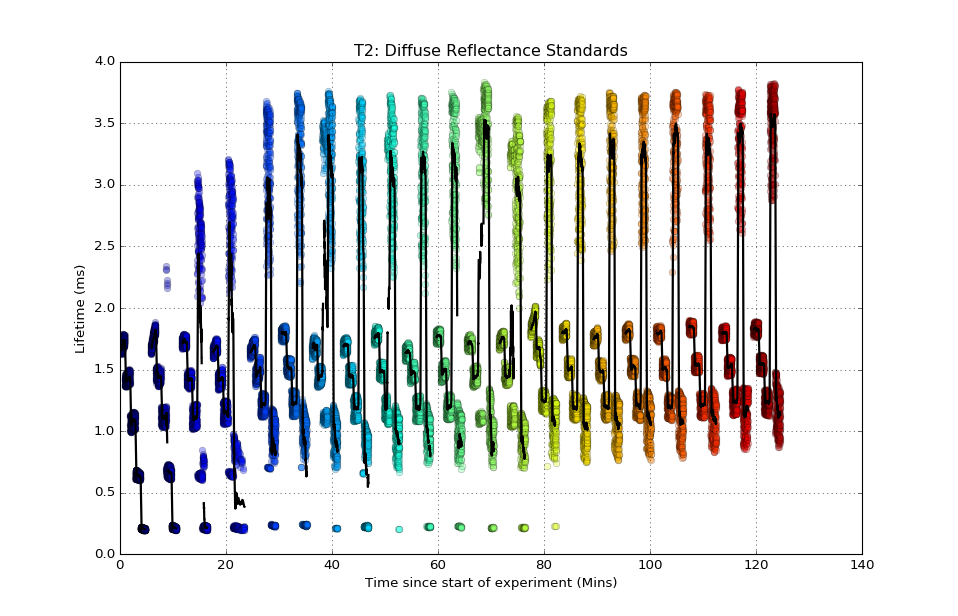

In [25]:
# Create colormap for plotting
n = len(df.concentration.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# All in one
fig, ax = plt.subplots()

for key, group in grouped:
    ax.plot(group['delta'], group['A'], 'o', alpha=0.3, label=key)
    rolling = group['A'].rolling(window=50).mean()
#     ax.plot(group['delta'], rolling, '-', lw=2, label='rolling ({k})'.format(k=key), color='black')
    ax.plot(group['delta'], rolling, '-', lw=2, label='rolling average', color='black')

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), loc='best', ncol=2, fontsize='medium')
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Lifetime (ms)')
plt.title('{}: Diffuse Reflectance Standards'.format(df.chip.unique()[0]))
if save:
    plt.savefig(data_folder +  str(folder) + '/lifetimeVsTime.png', dpi=500)

# Each concentration vs lifetime (Rolling Mean)

In [11]:
plt.close("all")

In [12]:
# Make directory to store files
directory = data_folder + str(folder) + '/individual/'
if not os.path.exists(directory):
    os.makedirs(directory)

<IPython.core.display.Javascript object>


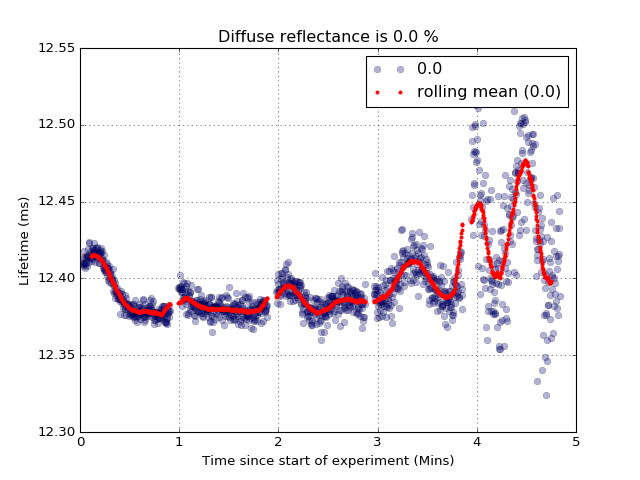

<IPython.core.display.Javascript object>


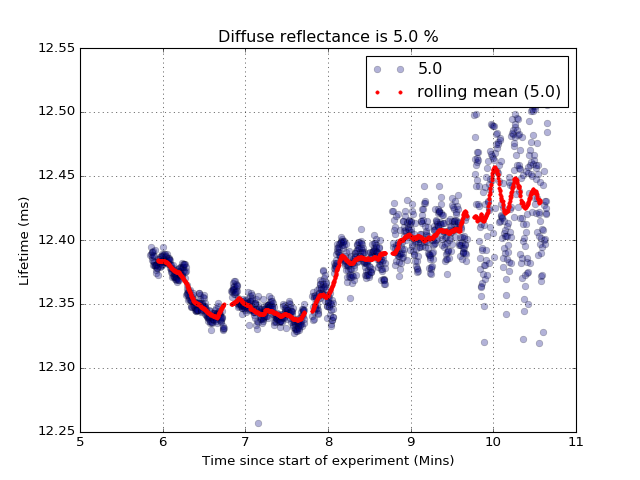

<IPython.core.display.Javascript object>


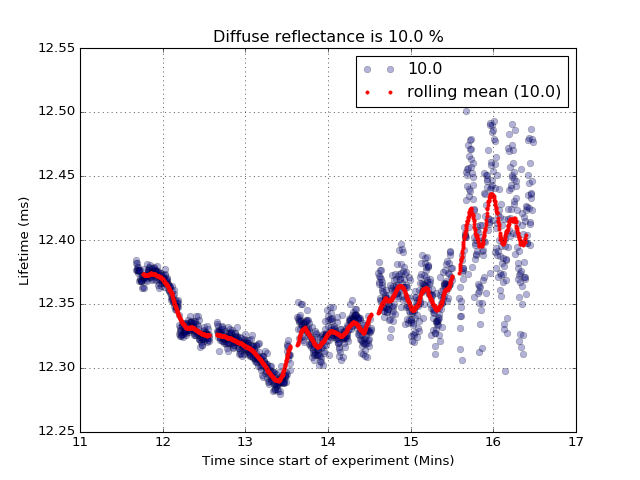

<IPython.core.display.Javascript object>


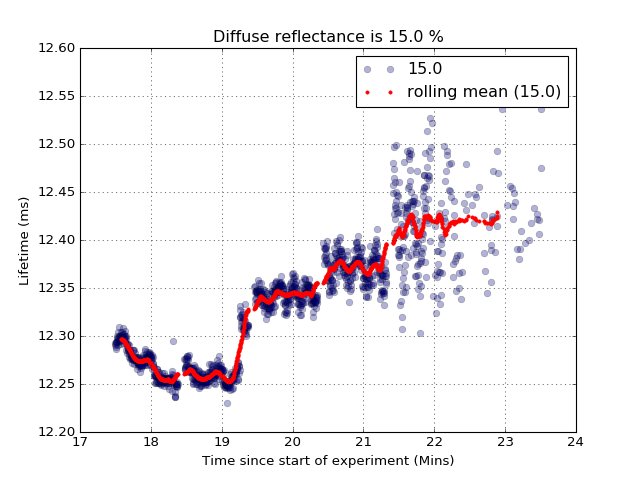

<IPython.core.display.Javascript object>


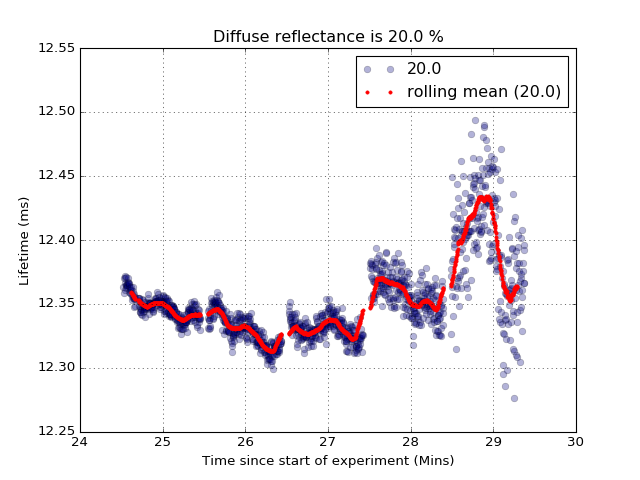

<IPython.core.display.Javascript object>


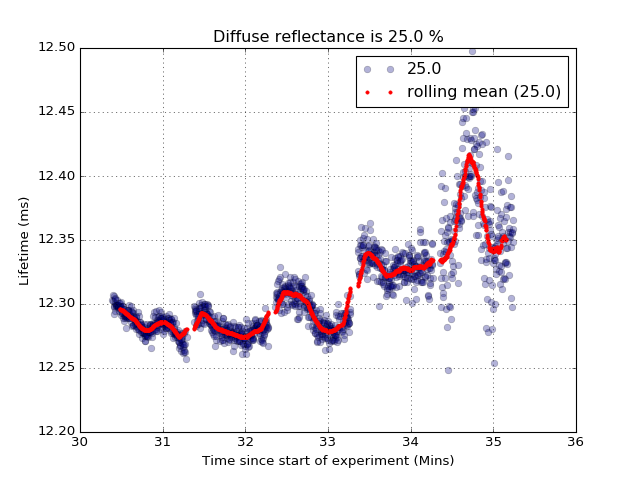

<IPython.core.display.Javascript object>


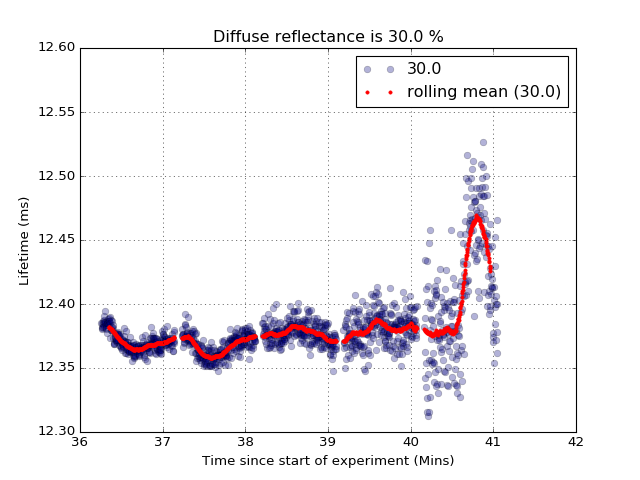

<IPython.core.display.Javascript object>


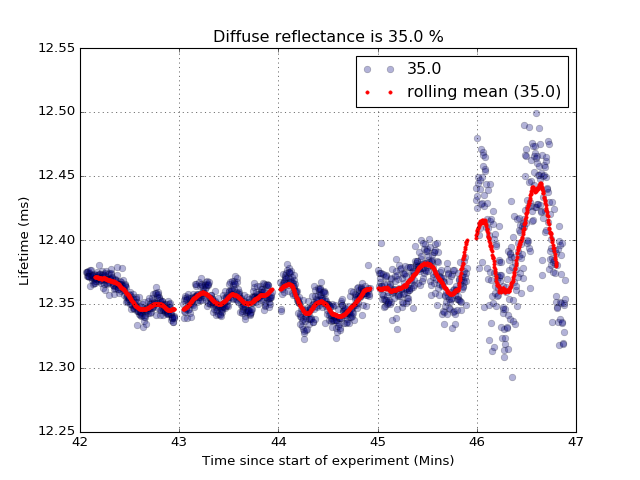

<IPython.core.display.Javascript object>


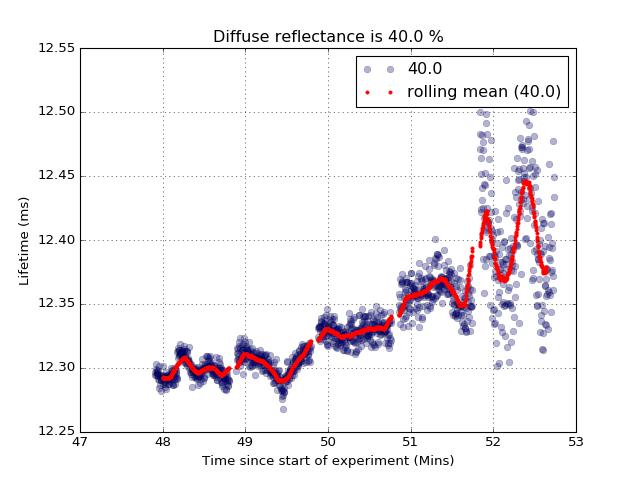

<IPython.core.display.Javascript object>


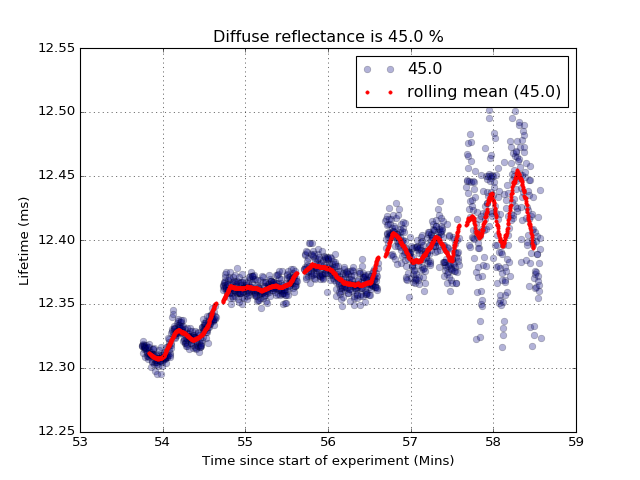

<IPython.core.display.Javascript object>


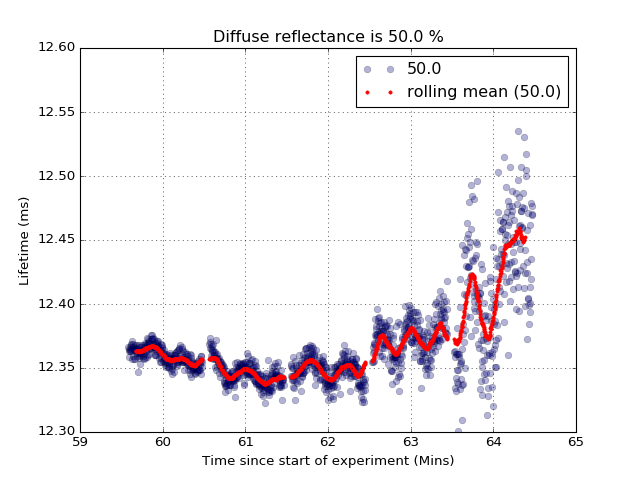

<IPython.core.display.Javascript object>


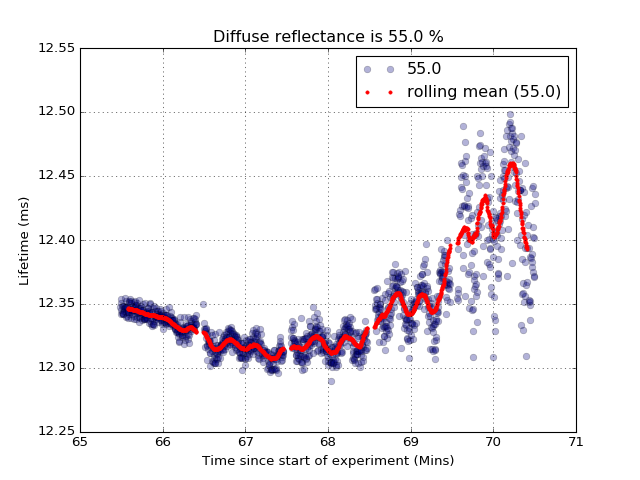

<IPython.core.display.Javascript object>


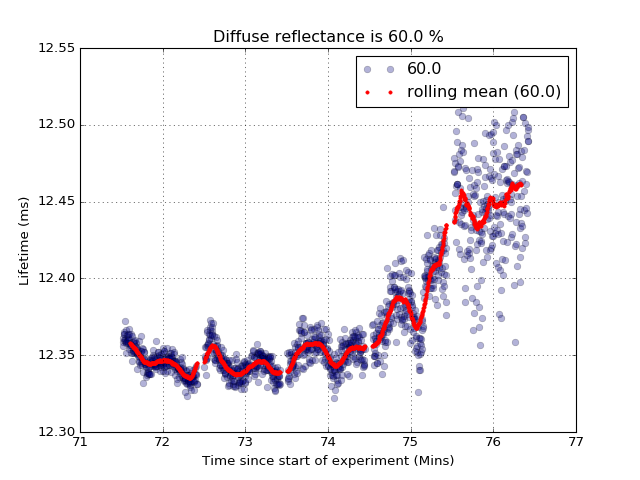

<IPython.core.display.Javascript object>


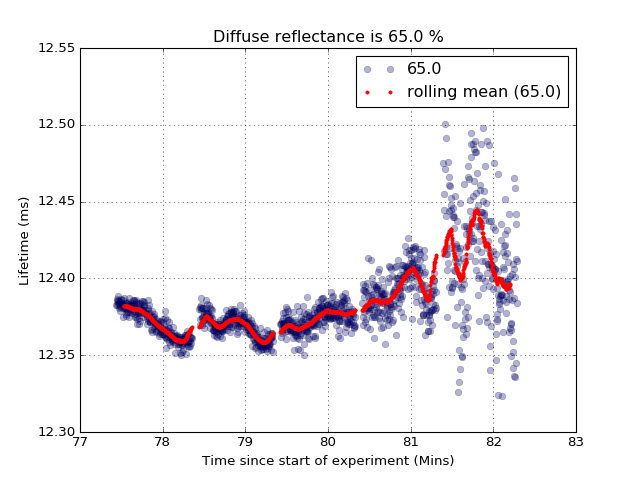

<IPython.core.display.Javascript object>


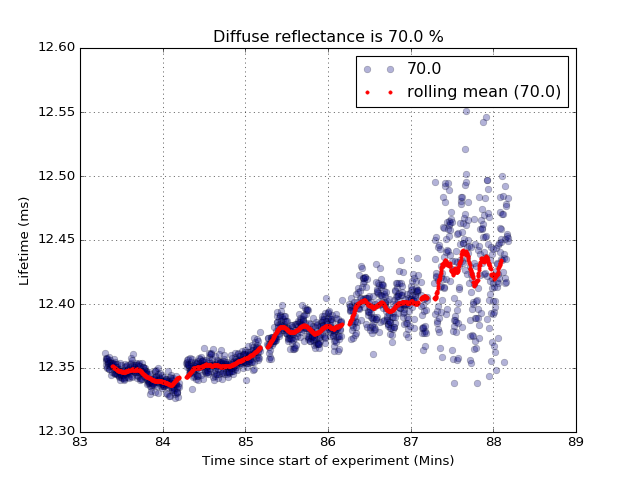

<IPython.core.display.Javascript object>


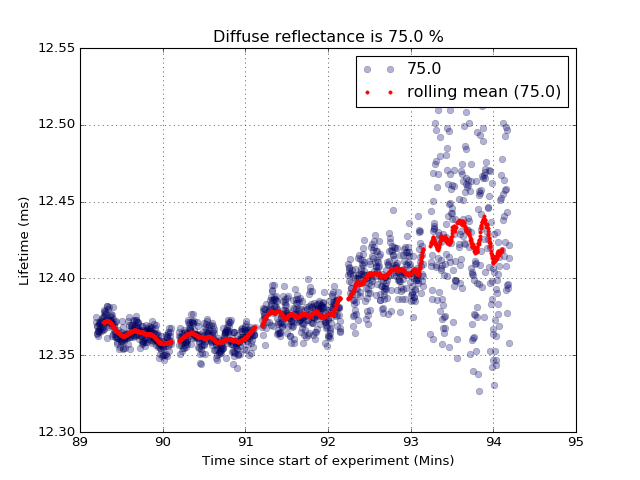

<IPython.core.display.Javascript object>


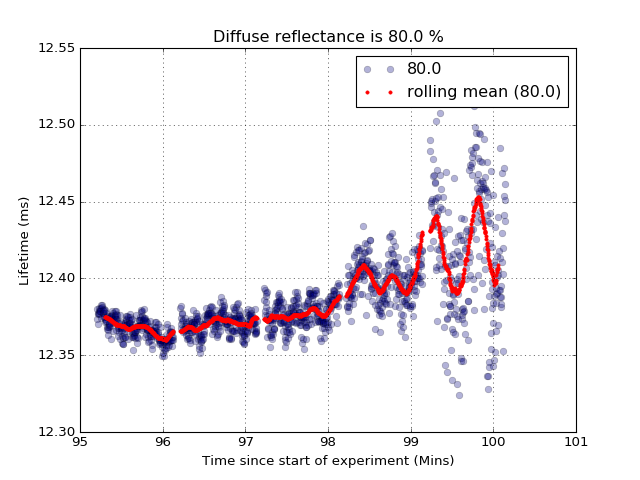

<IPython.core.display.Javascript object>


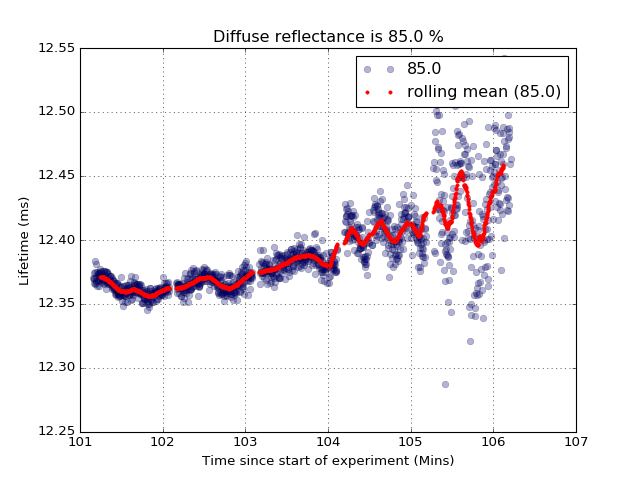

<IPython.core.display.Javascript object>


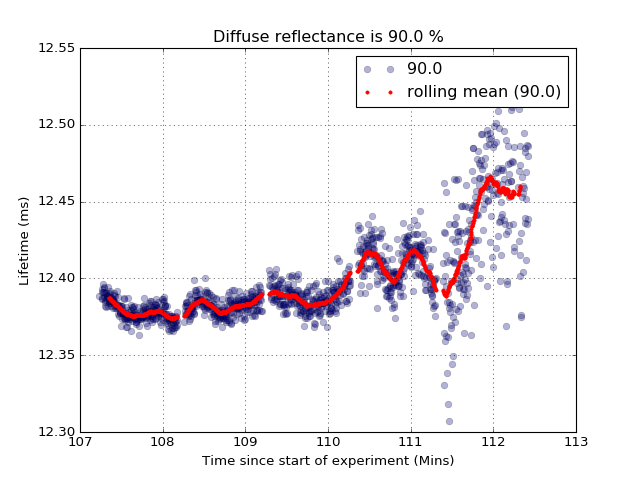

<IPython.core.display.Javascript object>


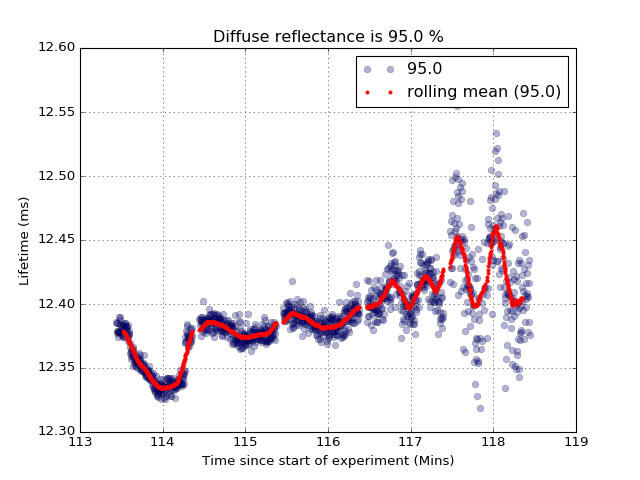

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


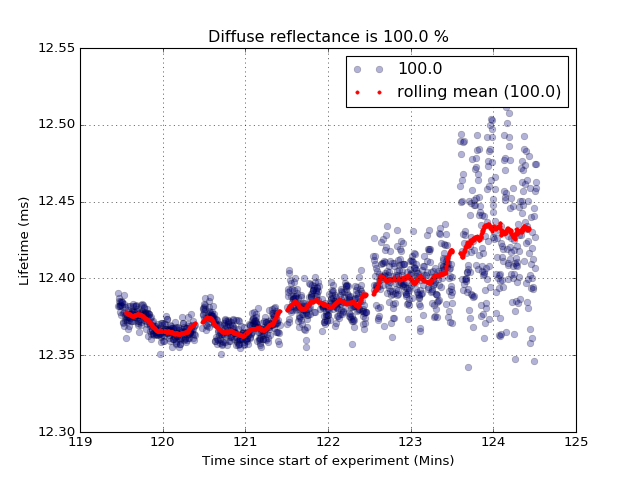

In [13]:
# Individual plots
for key, group in grouped:
    plt.figure()
    plt.ticklabel_format(useOffset=False, axis='y')
    plt.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50, center=True).mean()
    plt.plot(group['delta'], rolling, '.', lw=3, color='red', label='rolling mean ({k})'.format(k=key)) 
    plt.title('Diffuse reflectance is {} %'.format(key))
    plt.grid()
    plt.xlabel('Time since start of experiment (Mins)')
    plt.ylabel('Lifetime (ms)')
    plt.legend()
if save:
    plt.savefig(data_folder + str(folder) + '/individual/' + str(key) + '.png', dpi=200)

In [14]:
plt.close("all")

In [17]:
df2 = df[['concentration', 'current', 'tau', 'A']]

In [16]:
# Drop 0 reflectance (air) as this has a refractive index of 1 
# whereas all the scattering standards have a refractive index of 1.35
df2 = df2[df2['concentration'] != 0]

## tau & A vs concentration

In [18]:
# Apply mean and std functions to all collumns
g = df2.groupby(['current', 'concentration']).agg([np.mean, np.std])
g.head()

tau                   A          
                            mean       std      mean       std
current concentration                                         
0.1     0.0            12.431833  0.043134  0.182537  0.000887
        5.0            12.433539  0.044719  0.176186  0.000711
        10.0           12.410530  0.044213  0.166977  0.000756
        15.0           12.419409  0.046326  0.166500  0.003612
        20.0           12.396450  0.043028  0.175428  0.001674

In [20]:
g2 = g.reset_index()
g3 = g2.groupby('current')

<IPython.core.display.Javascript object>


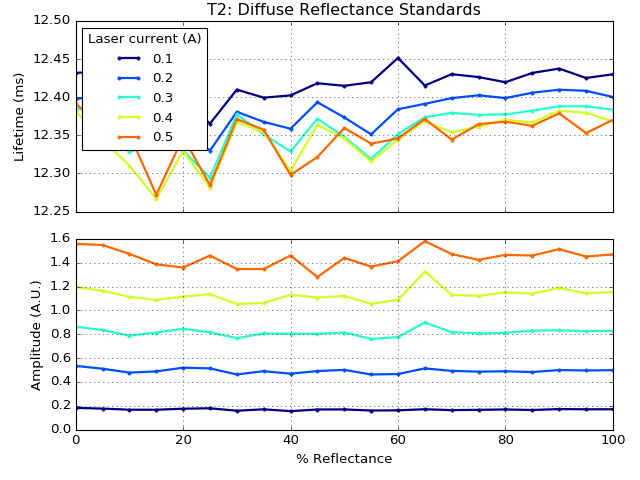

In [21]:
# Create colormap for plotting
n = len(df.current.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for key, group in g3:
    ax1.plot(group['concentration'], group['tau']['mean'], '.-', lw='2', label=key)
    ax2.plot(group['concentration'], group['A']['mean'], '.-', lw='2', label=key)

ax2.set_xlabel('% Reflectance')
ax1.set_ylabel('Lifetime (ms)')
ax2.set_ylabel('Amplitude (A.U.)')

ax1.grid()
ax2.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')
ax1.set_title('{}: Diffuse Reflectance Standards'.format(df.chip.unique()[0]))
ax1.legend(title='Laser current (A)', loc='best', fontsize='medium')
if save:
    plt.savefig(data_folder +  str(folder) + '/final.png', dpi=500)

In [22]:
x = g2.concentration
y = g2.current

<IPython.core.display.Javascript object>


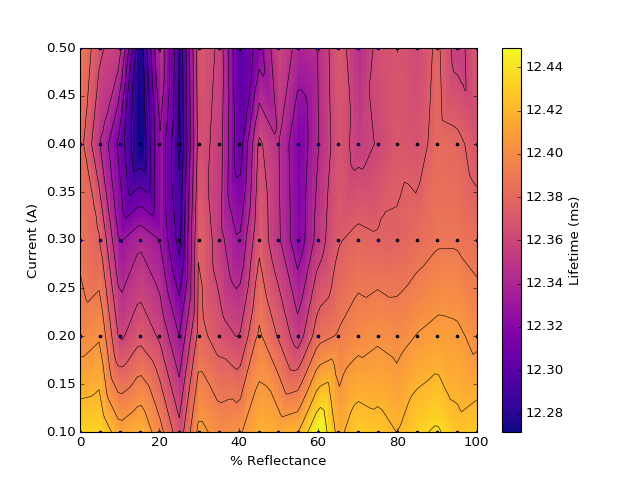

In [23]:
z = g2['tau']['mean']

fig, ax = plt.subplots()
xi = np.linspace(min(x), 100, len(x))
yi = np.linspace(min(y), max(y), len(y))
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('plasma'))
plt.colorbar(label='Lifetime (ms)')
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(min(x), 100)
plt.ylim(min(y), max(y))
ax.set_xlabel('% Reflectance')
ax.set_ylabel('Current (A)')
if save:
    plt.savefig(data_folder +  str(folder) + '/contour_tau.png', dpi=500)

<IPython.core.display.Javascript object>


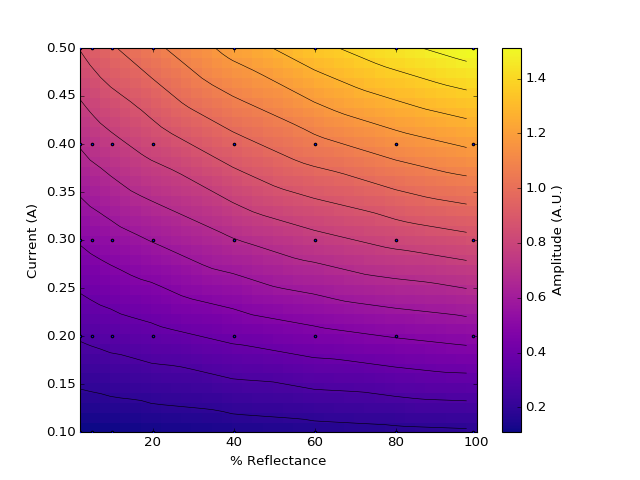

In [26]:
z = g2['A']['mean']
fig, ax = plt.subplots()
xi = np.linspace(min(x), 100, len(x))
yi = np.linspace(min(y), max(y), len(y))
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('plasma'))
plt.colorbar(label='Amplitude (A.U.)')
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(min(x), 100)
plt.ylim(min(y), max(y))
ax.set_xlabel('% Reflectance')
ax.set_ylabel('Current (A)')
if save:
    plt.savefig(data_folder +  str(folder) + '/contour_amp.png', dpi=500)